In [14]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

Problem 2: The number of seconds that have lapsed between 1 June at noon and 14 Aug, 9:30 AM

In [1]:
60*60*24*30

2592000

There are 2592000 seconds in the month of June.

In [2]:
(2592000) + (60*60*24*13) + (60*60*9) + (60*30)

3749400

Problem 3:

In [3]:
#Import Table
worldpop = Table.read_table('world_population.csv')
worldpop

Population
2557628654
2594939877
2636772306
2682053389
2730228104
2782098943
2835299673
2891349717
2948137248
3000716593


In [4]:
#3.a
worldpop.take(65) 

Population
7256490011


The population in 2015 is 7256490011.

In [13]:
#3.b
pop1950 = worldpop.column("Population").item(0)
pop2015 = worldpop.column("Population").item(65)
pop2015-pop1950

4698861357

The population growth between 1950 and 2015 is 4698861357.

In [5]:
#3.c
import numpy as np
poparray = worldpop.column("Population")
per = 0
for x in range(0, 65):
    y = (poparray.item(x+1)/poparray.item(x)) - 1
    per = per + y
aagr = per/worldpop.num_rows
print(aagr)

0.01593286276182432


Average Annual Growth Rate is 1.59%

Problem 4:

In [6]:
#Import table
titanic = Table.read_table('titanic_data.csv')
titanic

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [7]:
#4.a 'Pclass' column is relabeled to 'passenger_class'
titanic.relabeled('Pclass', 'passenger_class')

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


In [8]:
#4.b New column called 'family_size' is created that adds the number of 
#   siblings/spouses, 'SibSp', to the number of children, 'Parch'
titanic.with_column('family_size', titanic['SibSp']+titanic['Parch'])

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


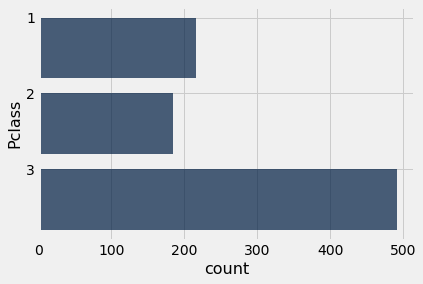

In [16]:
#4.c A barplot of number of passengers, broken down by passenger class
class_table = titanic.group("Pclass") #create table to graph
class_table.barh('Pclass', 'count')

In [17]:
#4.d Show the youngest 5 passengers
young_age_table = titanic.sort('Age')
young_age_table.show(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S


In [18]:
#4.e Show oldest 5 passengers
old_age_table = titanic.sort('Age', descending = True)
no_nan = old_age_table.where('Age', are.above(0))
no_nan.show(5)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q


In [23]:
#4.f
surv_table = titanic.select('Survived', 'Pclass')
surv_table2 = surv_table.group('Pclass', sum)
surv_table2 #create a table of number of survived grouped by passenger class
surv_array = surv_table2.column('Survived sum')/(136+87+119) #find survival rate for each class
#create variables for each rate
class1 = surv_array.item(0)
class2 = surv_array.item(1)
class3 = surv_array.item(2)
#create table to display survival rates per class
survival_rate = Table().with_columns(
   "passenger_class", make_array("1","2","3"),
   "survived", make_array(class1, class2, class3))
survival_rate

passenger_class,survived
1,0.397661
2,0.254386
3,0.347953


In [25]:
#4.g 
#What is the percent of male and females
sex_table = titanic.group('Sex')
count = sex_table.column('count')
ratio = count/(135+577)
print('The percentage of females was 44.10% and males was 81.04%.')

#What is the average fare
fare_table = titanic.column("Fare")
avg_fare = fare_table.sum()/(135+577)
print("The average fare per passenger is $40.")

The percentage of females was 44.10% and males was 81.04%.
The average fare per passenger is $40.
